SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 04 - Intensity transformations (Part 1)

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries
---

In [1]:
import numpy as np

from skimage import util, color

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### %matplotlib notebook

## Histogram
----
- The histogram of gray level digital image with intensity values between $[0, L - 1]$ is a discrete function:

<font size="5">
$$h(r_k) = n_k$$
</font>

* $r_k$ : $k$-th intensity value
* $n_k$ : the number of pixels with $r_k$ value in the image

### Histogram of a simple image

* Generating a simple RGB image with 8 rows and 8 columns (64 pixels) and intensity resolution of 3 bits for each channel (values between 0 and 7). The image has been filled with random values.

In [2]:
# Generating an image with 8 x 8 pixels and 8 intensity levels.
img_simple_rgb = np.random.randint(0, 8, size=(8, 8, 3), dtype=np.uint8)

# Print some information about the image
print(img_simple_rgb.shape, img_simple_rgb.dtype, img_simple_rgb.min(), img_simple_rgb.max())

(8, 8, 3) uint8 0 7


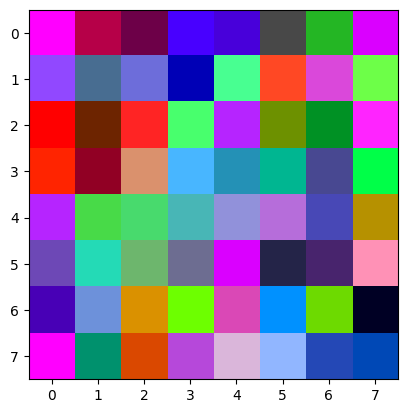

In [3]:
# Ploting the image
plt.figure()
plt.imshow(img_simple_rgb / 7) # Converte para [0, ..., 1] para vizualização
plt.show()

### Computing the image histogram

In [4]:
# Computing the image histogram using NumPy
hist_simple_r, bins = np.histogram(img_simple_rgb[:,:,0], bins=8, range=(0, 7))
hist_simple_g, bins = np.histogram(img_simple_rgb[:,:,1], bins=8, range=(0, 7))
hist_simple_b, bins = np.histogram(img_simple_rgb[:,:,2], bins=8, range=(0, 7))

# Print the histogram values
print(hist_simple_r)
print(bins)

[ 8  5 14 11  4  6  8  8]
[0.    0.875 1.75  2.625 3.5   4.375 5.25  6.125 7.   ]


### Computing the image normalized histogram

In [5]:
# Computing the image normalized histogram using NumPy
hist_simple_r_norm = hist_simple_r / (img_simple_rgb.shape[0] * img_simple_rgb.shape[1])
hist_simple_g_norm = hist_simple_g / (img_simple_rgb.shape[0] * img_simple_rgb.shape[1])
hist_simple_b_norm = hist_simple_b / (img_simple_rgb.shape[0] * img_simple_rgb.shape[1])

# Print the histogram values.
print(hist_simple_r_norm)
print(hist_simple_r_norm.sum())
print(bins)

[0.125    0.078125 0.21875  0.171875 0.0625   0.09375  0.125    0.125   ]
1.0
[0.    0.875 1.75  2.625 3.5   4.375 5.25  6.125 7.   ]


### Ploting the histograms for each image color channel

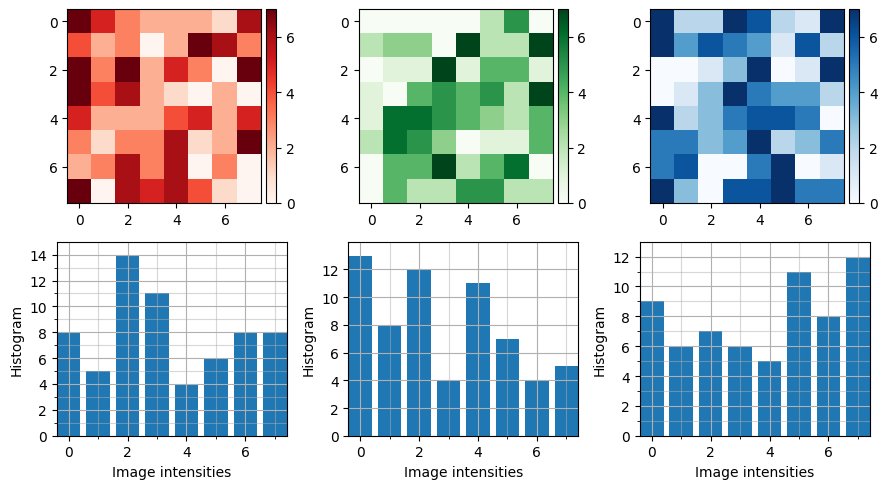

In [6]:
fig, ((ax1, ax5, ax6), (ax2, ax3, ax4)) = plt.subplots(2,3, figsize=(9, 5))

# Ploting the image RED channel
im_0 = ax1.imshow(img_simple_rgb[:,:,0], cmap='Reds', vmin=0, vmax=7)
# Ploting the color bar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

# Ploting the image GREEN channel
im_1 = ax5.imshow(img_simple_rgb[:,:,1], cmap='Greens',  vmin=0, vmax=7)
# Ploting the color bar
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

# Ploting the image BLUE channel
im_2 = ax6.imshow(img_simple_rgb[:,:,2], cmap='Blues',  vmin=0, vmax=7)
# Ploting the color bar
divider = make_axes_locatable(ax6)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_2, cax=cax)

# Plot the histogram (bar chart) of the image's RED channel
ch_0 = ax2.bar(np.arange(0, 8), hist_simple_r)
# *** Plot settings ***
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 8, 2))
ax2.set_xticks(np.arange(0, 8, 1), minor=True)
ax2.set_yticks(np.arange(0, hist_simple_r.max()+0.01, 2), minor=False)
ax2.set_yticks(np.arange(0, hist_simple_r.max()+0.01, 1), minor=True)
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_simple_r.max()+1)
ax2.set_xlabel('Image intensities', fontsize='medium')
ax2.set_ylabel('Histogram', fontsize='medium')

# Plot the histogram (bar chart) of the image's GREEN channel
ch_1 = ax3.bar(np.arange(0, 8), hist_simple_g)
# *** Plot settings ***
ax3.autoscale(enable=True, axis='both', tight=True)
ax3.set_xticks(np.arange(0, 8, 2))
ax3.set_xticks(np.arange(0, 8, 1), minor=True)
ax3.set_yticks(np.arange(0, hist_simple_g.max()+0.01, 2), minor=False)
ax3.set_yticks(np.arange(0, hist_simple_g.max()+0.01, 2), minor=True)
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, hist_simple_g.max()+1)
ax3.set_xlabel('Image intensities', fontsize='medium')
ax3.set_ylabel('Histogram', fontsize='medium')

# Plot the histogram (bar chart) of the image's BLUE channel
ch_2 = ax4.bar(np.arange(0, 8), hist_simple_b)
# *** Plot settings ***
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 8, 2))
ax4.set_xticks(np.arange(0, 8, 1), minor=True)
ax4.set_yticks(np.arange(0, hist_simple_b.max()+0.1, 2), minor=False)
ax4.set_yticks(np.arange(0, hist_simple_b.max()+0.1, 1), minor=True)
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_simple_b.max()+1)
ax4.set_xlabel('Image intensities', fontsize='medium')
ax4.set_ylabel('Histogram', fontsize='medium')

fig.tight_layout()
plt.show()

### Histogram of a real image

In [7]:
# Load an image from disk
img_gray = plt.imread('./images/boat.tif')

# Print some information about the image
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


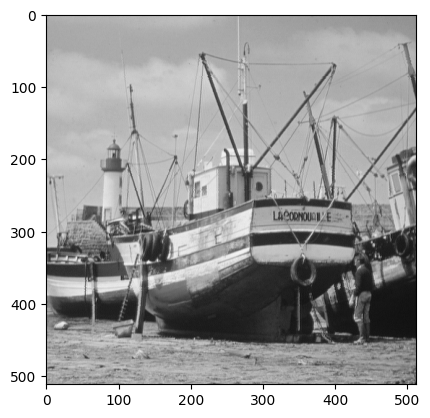

In [8]:
# Ploting the image
plt.figure()
plt.imshow(img_gray, cmap='gray') 
plt.show()

In [9]:
# Computing the image histogram using NumPy
hist, bins = np.histogram(img_gray, bins=256, range=(0, 256))

# Print the histogram values
### print(hist)
### print(bins)

#### Ploting the histogram

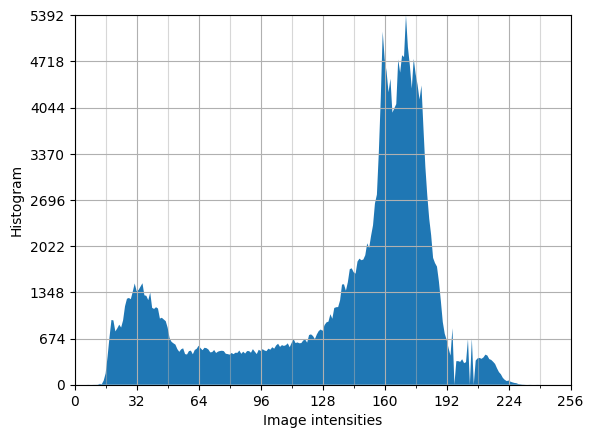

In [10]:
fig = plt.figure()
### plt.bar(bins[:-1], hist, width=bins[1]-bins[0], ec="black")
plt.fill_between(bins[:-1], hist)

# *** Plot settings ***
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 257, 32))
ax.set_xticks(np.arange(0, 257, 16), minor=True)
ax.set_yticks(np.arange(0, hist.max(), hist.max()//8), minor=False)
ax.set_yticks(np.arange(0, hist.max(), hist.max()//4), minor=True)
### ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, hist.max())
ax.set_xlabel('Image intensities', fontsize='medium')
ax.set_ylabel('Histogram', fontsize='medium')
plt.show()

#### Normalized histogram

In [11]:
hist_norm = hist / (img_gray.shape[0] * img_gray.shape[1])

### hist_norm

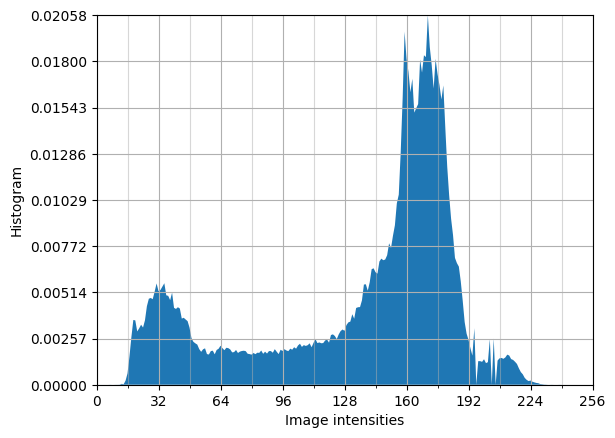

In [12]:
fig = plt.figure()
# Using bar charts
### plt.bar(bins[:-1], hist, width=bins[1]-bins[0], ec="black")
# Using filled line plot
plt.fill_between(bins[:-1], hist_norm)

# *** Plot settings ***
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 257, 32))
ax.set_xticks(np.arange(0, 257, 16), minor=True)
ax.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, hist_norm.max())
ax.set_xlabel('Image intensities', fontsize='medium')
ax.set_ylabel('Histogram', fontsize='medium')
plt.show()

## Image negative
----

* For images with integer data type:

<font size="5">
$$s = (L-1) - r$$
</font>


* For images with float data type:

<font size="5">
$$s = 1.0 - r$$
</font>

In [13]:
# Array with each possible intensity value in an unsigned 8-bit image.
# [0, 1, 2, ..., 255]
r = np.linspace(0, 1, 256)

### Ploting the transformation function

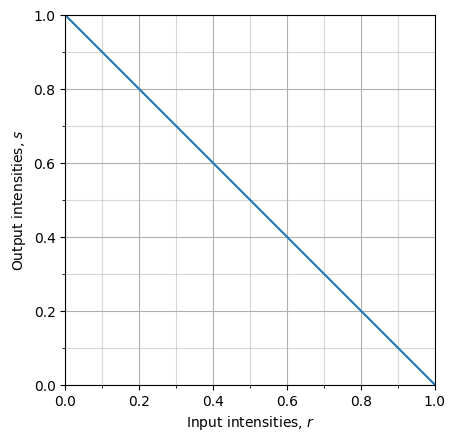

In [14]:
fig = plt.figure()
plt.plot(r, 1. - r)
    
# *** Plot settings ***
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2), minor=False)
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Input intensities, $r$', fontsize='medium')
ax.set_ylabel('Output intensities, $s$', fontsize='medium')

plt.show()

### Applying the negative transformation to the image

In [15]:
# Converts the image to float with values in the range [0., 1.]
img_gray_float = util.img_as_float(img_gray)

# Apply the negative transformation
img_neg = 1. - img_gray_float

In [16]:
# Computes the histogram and normalized histogram of the original image
hist, bins = np.histogram(img_gray_float, bins=256, range=(0, 1))
hist_norm = hist / (img_gray.shape[0] * img_gray.shape[1])

# Computes the histogram and normalized histogram of the processed image
hist_neg, bins_neg= np.histogram(img_neg, bins=256, range=(0, 1))
hist_neg_norm = hist_neg / (img_neg.shape[0] * img_neg.shape[1])

### Plotting the images

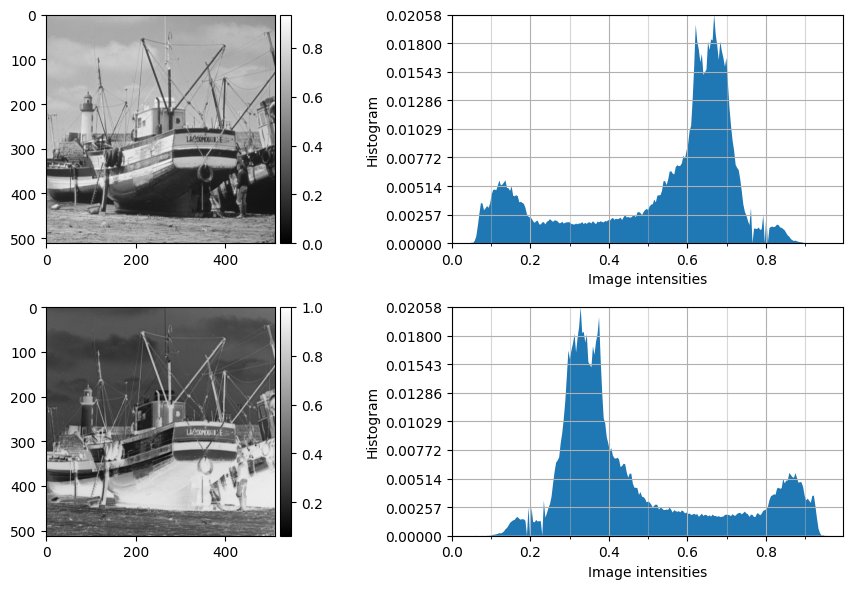

In [17]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2, figsize=(9,6))

im_0 = ax1.imshow(img_gray_float, cmap='gray')
# Color bar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax2.imshow(img_neg, cmap='gray')
# Color bar
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

ch_0 = ax3.fill_between(bins[:-1], hist_norm)
# *** Plot settings ***
ax3.autoscale(enable=True, axis='both', tight=True)
ax3.set_xticks(np.arange(0, 1, 0.2))
ax3.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax3.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax3.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, hist_norm.max())
ax3.set_xlabel('Image intensities', fontsize='medium')
ax3.set_ylabel('Histogram', fontsize='medium')

ch_1 = ax4.fill_between(bins[:-1], hist_neg_norm)
# *** Plot settings ***
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 1, 0.2))
ax4.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_norm.max())
ax4.set_xlabel('Image intensities', fontsize='medium')
ax4.set_ylabel('Histogram', fontsize='medium')

plt.tight_layout()
plt.show()

## Logaritmic transformations
----

<font size="5">
$$s = c \times log(1+r)$$
</font>
<br />

* where $c$ is a constant, also called $gain$.

In [18]:
# Todos os valores possíveis em uma imagem de 8 bits sem sinal. [0, 1, 2, ..., 255]
r = np.linspace(0, 1, 256)

# Lista com alguns valores para o ganho (c)
gain_list = [1., 1.45, 2, 5]

### Plotting the logarithmic transformation functions

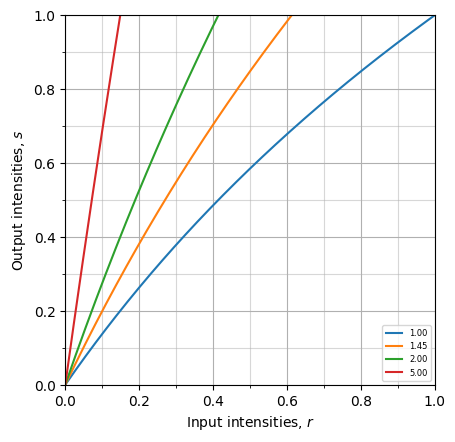

In [19]:
fig = plt.figure()
for gain in gain_list:
    plt.plot(r, gain * np.log2(1 + r), label=str('%.2f'%(gain))) # [log, log2, log10]
    ### plt.plot(r, gain * np.log(1 + r), label=str('%.2f'%(gain))) 

# *** Plot settings ***
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2), minor=False)
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Input intensities, $r$', fontsize='medium')
ax.set_ylabel('Output intensities, $s$', fontsize='medium')
plt.legend(loc="best", fontsize='6')

plt.show()

### EXAMPLE: Fourier Transform

In [20]:
# Carrega uma imagem do disco
img_gray = plt.imread('./images/boat.tif')

# Printing information about images
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


#### Plotting the images

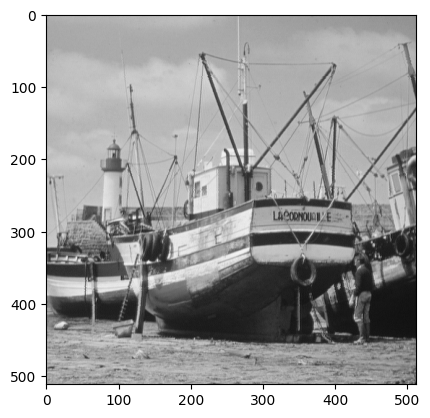

In [21]:
plt.figure()
plt.imshow(img_gray, cmap='gray')

plt.show()

In [22]:
# Compute the Fourier transform of the image
img_fft = np.fft.fft2(img_gray)
img_fft_sh = np.fft.fftshift(img_fft)

# Compute the Fourier spectrum
img_fft = np.abs(img_fft)
img_fft_sh = np.abs(img_fft_sh)

# Printing information about images
print(img_fft.shape, img_fft.dtype, img_fft.min(), img_fft.max())
print(img_fft_sh.shape, img_fft_sh.dtype, img_fft_sh.min(), img_fft_sh.max())

(512, 512) float64 2.289763958594981 35684826.0
(512, 512) float64 2.289763958594981 35684826.0


#### Plotting the images without logarithmic transformation

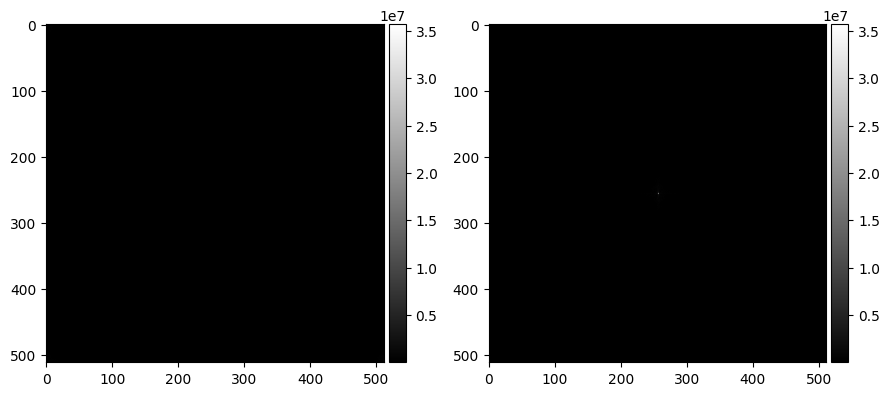

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(9,5))
im_0 = ax[0].imshow(img_fft, cmap='gray')
# Color bar
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax[1].imshow(img_fft_sh, cmap='gray')
# Color bar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

plt.tight_layout()
plt.show()

#### Plotting the images with logarithmic transformation

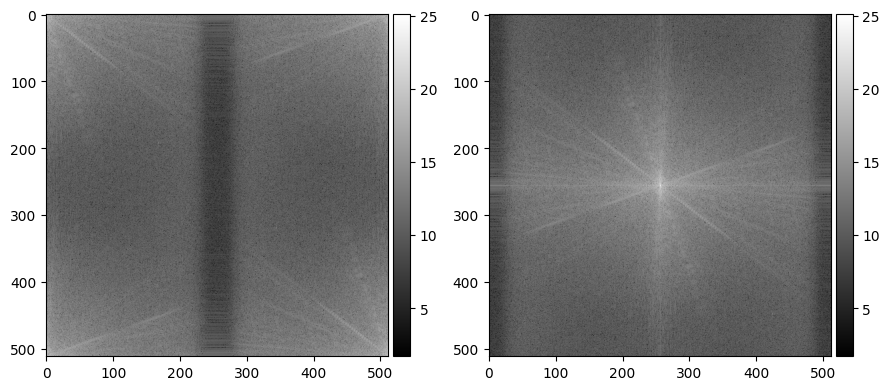

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
im_0 = ax[0].imshow(np.log2(1 + img_fft), cmap='gray')
# Color bar
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax[1].imshow(np.log2(1 + img_fft_sh), cmap='gray')
# Color bar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

plt.tight_layout()
plt.show()

## Power transfomations (gamma)
----

<font size="5">
$$s = c \times r^ \gamma$$
</font>
<br />

* where $c$ and $\gamma$ are positive constants.

In [25]:
# Values smaller than 1
gamma_list = list(np.linspace(0.05, 1, 6))

# Values larger than 1
for i in range(5):
    gamma_list.append(gamma_list[-1] * 2)
    
print(gamma_list)

[0.05, 0.24, 0.43, 0.6200000000000001, 0.81, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]


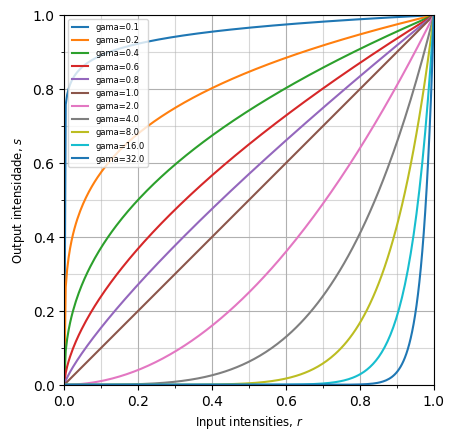

In [26]:
fig = plt.figure()
for g in gamma_list:
    plt.plot(r, r**g, label='gama='+str('%.1f'%(g)))
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2), minor=False)
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Input intensities, $r$', fontsize='small')
ax.set_ylabel('Output intensidade, $s$', fontsize='small')
plt.legend(loc="best", fontsize='6')

plt.show()

### EXAMPLE: Gamma transformation application

In [27]:
img_gray = plt.imread('./images/boat.tif')

# Prints information about the image
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


In [28]:
# Convert image to float
img_gray_float = util.img_as_float(img_gray)

# Prints information about the image
print(img_gray_float.shape, img_gray_float.dtype, img_gray_float.min(), img_gray_float.max())

(512, 512) float64 0.0 0.9372549019607843


* $\gamma = 0.2$

In [29]:
# Set the gamma value
gama = 0.2

# Gamma transformation
img_gama_02 = img_gray_float ** gama

# Compute the histograms
hist_gama_02, bins_gama_02 = np.histogram(img_gama_02, bins=256, range=(0, 1))
hist_gama_02_norm = hist_gama_02 / (img_gama_02.shape[0] * img_gama_02.shape[1])

* $\gamma = 4.0$

In [30]:
# Set the gamma value
gama = 4.

# Gamma transformation
img_gama_40 = img_gray_float ** gama

# Compute the histograms
hist_gama_40, bins_gama_40 = np.histogram(img_gama_40, bins=256, range=(0, 1))
hist_gama_40_norm = hist_gama_40 / (img_gama_40.shape[0] * img_gama_40.shape[1])

### print("%.4f" % (hist_gama_40_norm[0]))

### Plotting the images

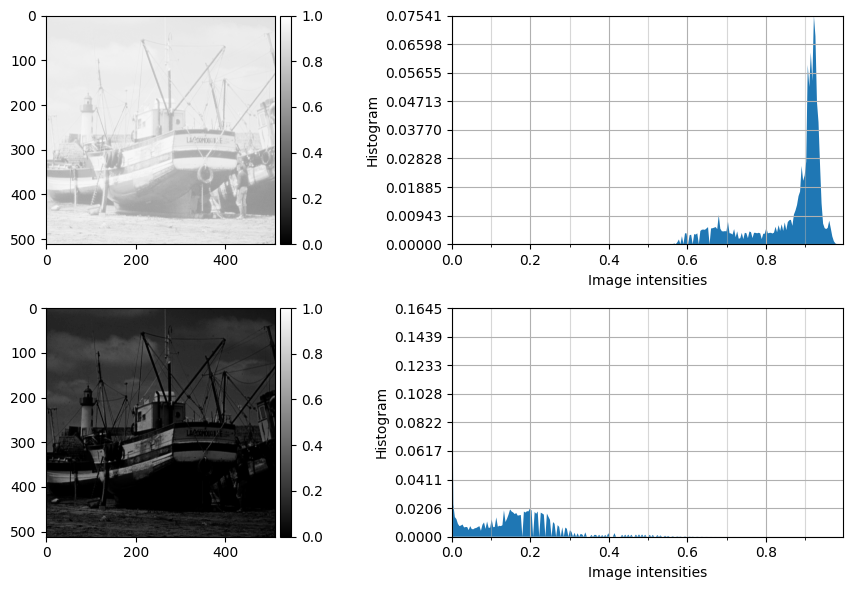

In [31]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2, figsize=(9,6))
im_0 = ax1.imshow(img_gama_02, cmap='gray', vmin=0, vmax=1)
# Color bar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax2.imshow(img_gama_40, cmap='gray', vmin=0, vmax=1)
# Color bar
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

ch_0 = ax3.fill_between(bins_gama_02[:-1], hist_gama_02_norm)
ax3.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax3.set_xticks(np.arange(0, 1, 0.2))
ax3.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax3.set_yticks(np.arange(0, hist_gama_02_norm.max()+0.01, hist_gama_02_norm.max()/8), minor=False)
ax3.set_yticks(np.arange(0, hist_gama_02_norm.max()+0.01, hist_gama_02_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, hist_gama_02_norm.max())
ax3.set_xlabel('Image intensities', fontsize='medium')
ax3.set_ylabel('Histogram', fontsize='medium')

ch_1 = ax4.fill_between(bins_gama_40[:-1], hist_gama_40_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax4.set_xticks(np.arange(0, 1, 0.2))
ax4.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax4.set_yticks(np.arange(0, hist_gama_40_norm.max()+0.01, hist_gama_40_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_gama_40_norm.max()+0.01, hist_gama_40_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_gama_40_norm.max())
ax4.set_xlabel('Image intensities', fontsize='medium')
ax4.set_ylabel('Histogram', fontsize='medium')

plt.tight_layout()
plt.show()

## Bibliography
----

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/